### <span style="background-color:Gold">mglyph library TODO</span>:

**Jakekoliv pripomiky co dodelat**

***
**TODO:**
* show - vicenasobny margin, ruzne default hodnoty pri `show_margin` a `show_shadow`
* zkusit relativni pri "nectvercovem"
* struktura pip+GIT
* join round jako path? - pres jaky bod ja jakeho krivkou
* opravit sdileny `interact`
* diff mezi obrazky
* transformacni matice
* ???
* ???

***

# Download the `mglyph` module from the git repository
This downloads the `mglyph` module from the public repository, sets the path to it and imports the module right away

<font color="red">zatim nastaveno ze je GIT lokalne stazen a tutorial se rozjede napr ve Visual Studiu</font>

jinak se bude muset udelat `git clone`

In [5]:
#!git clone https://git.fit.vutbr.cz/herout/mglyph.git

!pip install --upgrade --editable ..

# Now import the module, hopefully everything works
%load_ext autoreload
%autoreload 2
import mglyph as mg

Obtaining file:///home/vojtech/WORK/Glyphs/pip_test/mglyph
  Installing build dependencies ... one
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mglyph (pyproject.toml) ... done
  Created wheel for mglyph: filename=mglyph-1.0.0-0.editable-py3-none-any.whl size=3673 sha256=d28c04d67023cf0921bf721403fac8132f681b3ada4fb7139a43b32185be2bb8
  Stored in directory: /tmp/pip-ephem-wheel-cache-6r5j56i8/wheels/d0/62/08/c5c27670bfddce51bcf0534d1da5ac159bb6eede42d941e50a
Successfully built mglyph
  Attempting uninstall: mglyph
    Found existing installation: mglyph 1.0.0
    Uninstalling mglyph-1.0.0:
      Successfully uninstalled mglyph-1.0.0


# Connect to Google Drive for storing the Glyphs *(optional)*

This cell connects to the Google Drive (some prompts will appear, make sure to select the right account).

Then, it **makes a folder named `MGlyphs`** in `My Drive/MGlyphs`.  That's where generated glyphs will go to make it really easy to collect them on your computer.

Someone may want to set the `outpath` variable to something different?

In [62]:
# if 'google.colab' in sys.modules:
#     from google.colab import drive
#     drive.mount('/content/drive')
#     !mkdir -p /content/drive/MyDrive/Exported_MGlyphs
#     outpath = '/content/drive/MyDrive/Exported_MGlyphs'
# else:
#     !mkdir -p Exported_MGlyphs
#     outpath = 'Exported_MGlyphs'

In [ ]:
# prozatim jen lokalne
!mkdir -p Exported_MGlyphs
outpath = 'Exported_MGlyphs'

# Now the Malleable Glyph Tutorial

## Basics of making a Glyph

The glyph is essentially a function that takes two arguments:
* `x: float` – the glyph parameter, a number between 0.0 and 100.0
* `canvas: mg.Canvas` – the canvas object, where the glyph is to be drawn

For example:
```
def empty_glyph(x: float, canvas: mg.Canvas) -> None:
    pass
```
## Showing the glyph

`mg.show(my_glyph)` shows a few versions of the glyph at different parameter values (by default 10, 30, 50, 70, 90).

Optional arguments of mg.show() are:
* `x: int | float | list[float] | list[int] | list[list[float]] | list[list[int]]`
* `scale: float=1.0`
* `padding: str='5%'` - padding between glyphs in a grid - percentage relative to the canvas size
* `background: str | list[int]='whitesmoke'`
* `show_values: bool = False` - whether to show values (font size is dependent on padding size)
* `value_color: str | list[int]='black'` - color of values

## Interpolation and values
`mg.lerp(x, from, to)` – interpolates based on the parameter.  When `x==0.0`, the value is equal to `from`, when `x==100.0`, the value is equal to `to`, in between, the value is linearly interpolated.

The canvas knows important values that are usable for interpolating:
* `canvas.xleft`, `canvas.xcenter`, `canvas.xright`
* `canvas.ytop`, `canvas.ycenter`, `canvas.ybottom`
* `canvas.xsize`, `canvas.ysize`
* `canvas.center` – is a tuple of `(canvas.xcenter, canvas.ycenter)`
* All values are relative:
> * (0, 0) center
> * (-1, -1) top-left corner
> * (1, 1) bottom-right corner
> * ...

## Colors
All color can be set in multiple ways:

* RGB values - tuple or list of of values from 0 to 1.0, e.g. `(0,1,0)`, `[0.2,0.8,0.3]`
* RGBA values - tuple or list of of values from 0 to 1.0, e.g. `(0,1,0,0.8)`
* HEX values - string object beginning with '#' and with red, green, blue value. This format accept color in 3 or 6 value ex: `'#fff'` or `'#ffffff'`
* WEB values - string object standard human readable values, e.g. `'red'`, `'green'`, `'crimson'`, `'coral'`, ...


## Drawing a line: `canvas.line()`

`canvas.line((x1, y1), (x2, y2), ...)` draws a line 

## Now the very simplest glyph: `simple_horizontal_line`

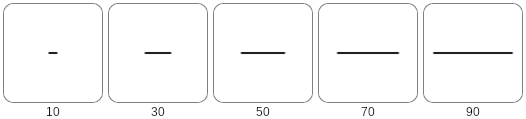

In [16]:
import mglyph as mg

def simple_horizontal_line(x: float, canvas:mg.Canvas) -> None:
    canvas.line((mg.lerp(x, canvas.xcenter, canvas.xleft), canvas.ycenter),    # line start
                (mg.lerp(x, canvas.xcenter, canvas.xright), canvas.ycenter),   # line end
                )

mg.show(simple_horizontal_line)

or potentialy relative values can be used

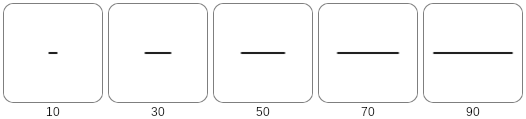

In [17]:
def simple_horizontal_line_relative(x: float, canvas:mg.Canvas) -> None:
    canvas.line((mg.lerp(x, 0, -1), 0),    # line start
                (mg.lerp(x, 0, 1), 0),   # line end
                )

mg.show(simple_horizontal_line_relative)

### Drawing a line: `canvas.line()`

Parameters:
* `p1: tuple[float, float]` - line start point
* `p2: tuple[float, float]` - line end point
* `color: list[int] | tuple[int] | list[float] | tuple[float] | str = 'black'` - color
* `width: float | str='20p'` - line width (`'1p'` is 1/1000 of the `paint area` dimension)
* `style: str='fill'` - drawing style
* `cap: str='butt'` - cap style
* `join: str='miter'` - join style

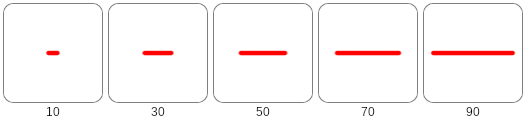

In [18]:
import mglyph as mg

def line_with_parameters(x: float, canvas:mg.Canvas) -> None:
    canvas.line((mg.lerp(x, 0, -1), 0),    # line start
                (mg.lerp(x, 0, 1), 0),   # line end
                width='50p',
                color='red',
                cap='round'
                )
    
mg.show(line_with_parameters)

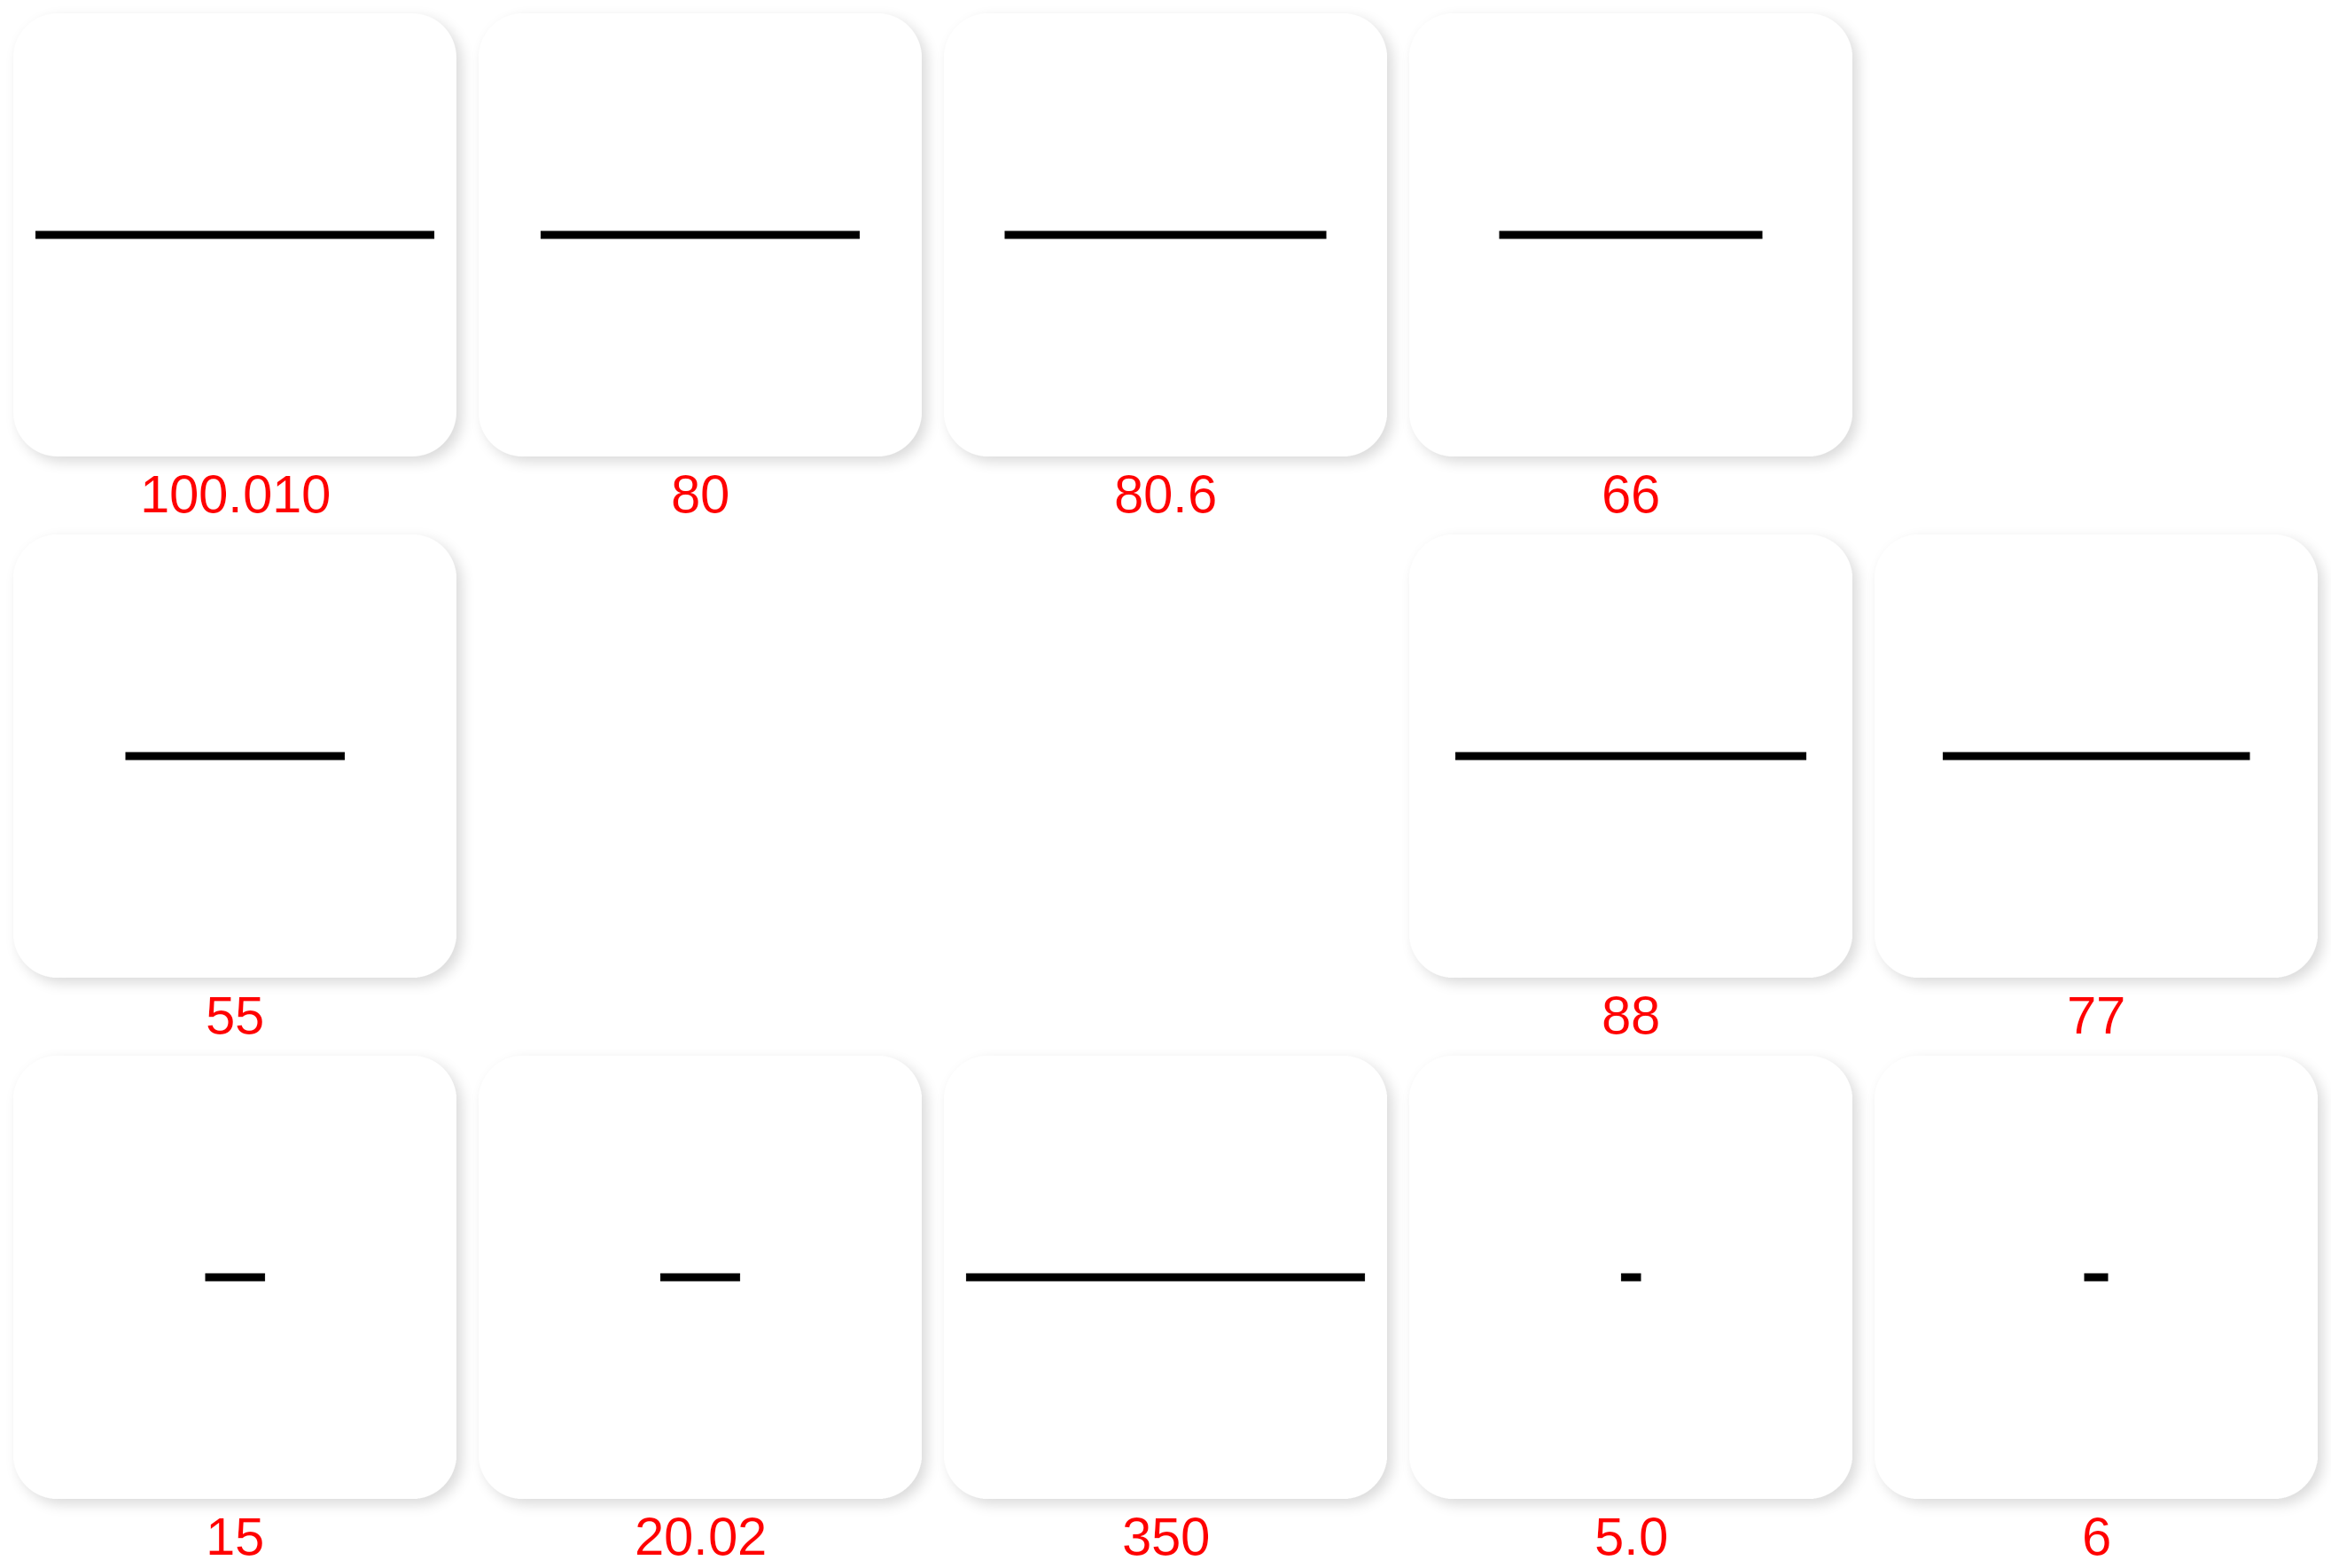

In [19]:
import mglyph as mg

def test(x: float, canvas:mg.Canvas) -> None:
    canvas.line((mg.lerp(x, canvas.xcenter, canvas.xleft), canvas.ycenter),    # line start

    (mg.lerp(x, canvas.xcenter, canvas.xright), canvas.ycenter),   # line end
    )
    # canvas.line((-5,-5), (5,5), color='red', width=50)
    # canvas.line((-5,5), (5,-5), color='blue', width=50)

mg.show(test, x=[['100.010', 80, 80.6, 66],
                [55,None,None,88,77],
                [15,20.02,350,5.000,6,]], canvas=mg.Canvas(canvas_round_corner=True), scale=5, show_value=True,
                spacing='5%', margin='3%', value_color='red', font_size='12%', border_width='1%',
                background='white', show_border=False, show_shadow=True, shadow_sigma='1.5%', shadow_shift=['1.2%','1.2%'], shadow_color=(0, 0, 0, 0.15))
# mg.show(test, x=[[60, 100],[8]], canvas=mg.Canvas(canvas_round_corner=True), scale=1, show_values=True, background='green',
#         spacing='10%', font_size='20%', margin='5%')

# mg.interact(test)

## Canvas layout
`canvas = mg.Canvas()`
Cotains `paint` area inside the whole canvas
Parameters:
* `padding_horizontal: str='10%'` - `paint area` padding relative to the whole canvas in %
* `padding_vertical: str='10%'` - `paint area` padding relative to the whole canvas in %
* `canvas_background: tuple[float] | str='white'` - background color of the whole canvas
* `canvas_border: bool=True` - whether to draw border around the canvas
* `canvas_round_corner: bool= True` - whether to use rounded corner of a border
* `canvas_border_color: tuple[float] | list[float] | str=(0.5, 0.5, 0.5)` - canvas border color
* `canvas_border_width: float='1%'` - canvas border width relative to the whole canvas in %
* `show_paint_border: bool=False` - show border of `paint area`

### Drawing a rectangle: `canvas.rect()`

Parameters:
* `tl: tuple[float, float]` - top-left point
* `br: tuple[float, float]` - bottom-right point
* `color: list[int] | tuple[int] | list[float] | tuple[float] | str = 'black'` - color
* `width: float | str='20p'` - stroke width (`'1p'` is 1/1000 of the `paint area` dimension)
* `style: str='fill'` - drawing style (fill or stroke)
* `cap: str='butt'` - cap style
* `join: str='miter'` - join style

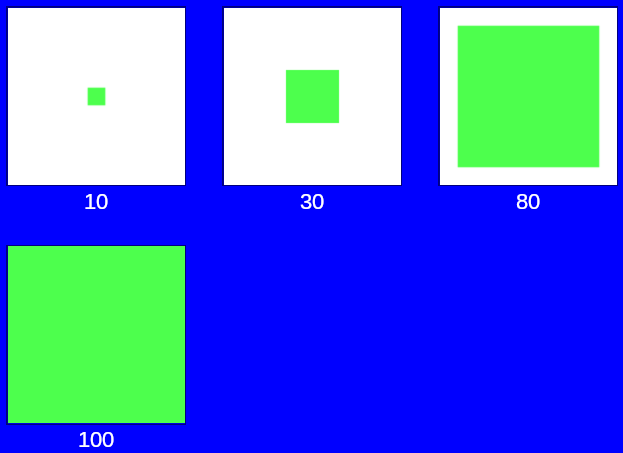

interactive(children=(FloatSlider(value=50.0, description='x'), Output()), _dom_classes=('widget-interact',))

In [25]:
import mglyph as mg

def simple_scaled_square(x: float, canvas: mg.Canvas) -> None:
    tl = (mg.lerp(x, 0.0, -1), mg.lerp(x, 0.0, -1.0))
    br = (mg.lerp(x, 0, 1), mg.lerp(x, 0, 1))
  
    canvas.rect(tl, br, color=(0,1,0,0.7))

mg.show(simple_scaled_square, 
        canvas=mg.Canvas(padding_horizontal='0%', padding_vertical='0%', show_paint_area_border=False,  canvas_round_corner=False), 
        x = [[10,30,80], [100]], scale=1.8,background='blue', show_value=True, spacing='20%', value_color='white')

mg.interact(simple_scaled_square)


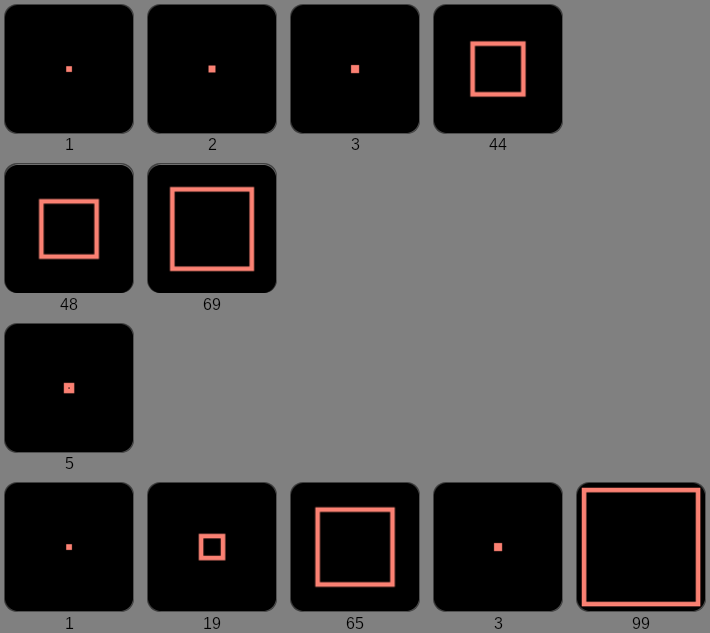

In [29]:

def simple_scaled_square_stroke(x: float, canvas: mg.Canvas) -> None:
    tl = (mg.lerp(x, canvas.xcenter, canvas.xleft), mg.lerp(x, canvas.ycenter, canvas.ytop))
    br = (mg.lerp(x, canvas.xcenter, canvas.xright), mg.lerp(x, canvas.ycenter, canvas.ybottom))
  
    canvas.rect(tl, br, color='Salmon', style='stroke', width=40)

# mg.show(simple_scaled_square_rect, background='black', x=80, scale=5)
mg.show(simple_scaled_square_stroke, 
        canvas=mg.Canvas(background_color='black'),
        background='gray', 
        x=[[1, 2, 3, 44, ],[48,69], [5], [1,19,65,3,99]], 
        scale=1.3, 
        spacing='10%')

### Drawing a polygon: `canvas.polygon()`

Parameters:
* `vertices: list[tuple[float, float]]` - list of vertices
* `color: list[int] | tuple[int] | list[float] | tuple[float] | str = 'black'` - color
* `width: float | str='20p'` - stroke width (`'1p'` is 1/1000 of the `paint area` dimension)
* `style: str='fill'` - drawing style (fill or stroke)
* `cap: str='butt'` - cap style
* `join: str='miter'` - join style
* `close: bool=True` - polygon closed

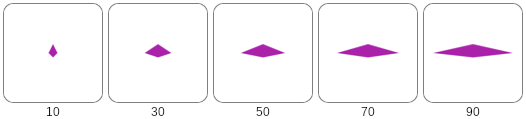

In [30]:
import mglyph as mg
def simple_polygon(x: float, canvas: mg.Canvas) -> None:
    l = (mg.lerp(x, canvas.xcenter, canvas.xleft), canvas.ycenter)
    ct = (canvas.xcenter, -0.2)
    r = (mg.lerp(x, canvas.xcenter, canvas.xright), canvas.ycenter)
    cb = (canvas.xcenter, 0.1)
    canvas.polygon([l, cb, r, ct], color='#A2a', close=True)
    
mg.show(simple_polygon)

# mg.show(simple_polygon, scale=1, background='gray', padding='1pt',
#         x=[[5, 10, 15, 20],
#            [5, 35, 65, 95]])

## Interactive visualization

`mg.interact(my_glyph)` runs an interactive playground, where you can tweak the parameter `x` and see what your glyph looks like.

You can use `mg.interact()` with any glyph to play around.

In [31]:
mg.interact(simple_polygon)

interactive(children=(FloatSlider(value=50.0, description='x'), Output()), _dom_classes=('widget-interact',))

## Simple circle: `simple_scaled_circle`

`canvas.circle(center, radius, ...)` – draws a circle

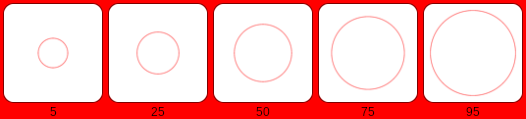

In [32]:
def simple_scaled_circle(x: float, canvas: mg.Canvas) -> None:
    canvas.circle(canvas.center, mg.lerp(x, 0.3, 1), color='red', style='stroke', width='5p')

mg.show(simple_scaled_circle, background='red', x=[5, 25, 50, 75, 95])

## Simple ellipse: `simple_scaled_ellipse`

`canvas.ellipse(center, radius_x, radius_y, paint)` – draws an ellipse

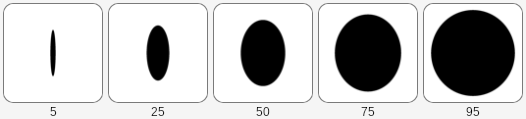

In [33]:
def simple_scaled_ellipse(x: float, canvas: mg.Canvas) -> None:

    canvas.ellipse(canvas.center, mg.lerp(x, 0.01, 1), mg.lerp(x, 0.5, 1))

mg.show(simple_scaled_ellipse, background='whitesmoke', x=[5, 25, 50, 75, 95])

## Five-pointed star made of lines: `simple_scaled_star`

`mg.orbit((x, y), angle, radius)` – is a helper function for rotating around a center. `angle` is in radians, starting at north, increasing counter-clockwise. `radius` is the distance of the orbiting point from the center.

The canvas offers the coordinates of the central point `canvas.center` for conveniently orbiting around the glyph center.

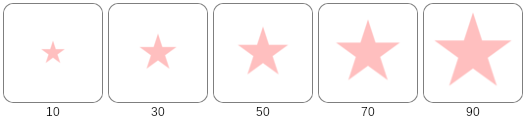

interactive(children=(FloatSlider(value=50.0, description='x'), Output()), _dom_classes=('widget-interact',))

In [35]:
import math

def simple_scaled_star(x: float, canvas: mg.Canvas) -> None:
    radius = mg.lerp(x, 0.2, canvas.ysize/2)
    vertices = []
    for segment in range(5):
        vertices.append(mg.orbit(canvas.center, segment * 2*math.pi/5, radius))
        vertices.append(mg.orbit(canvas.center, (segment + 0.5) * 2*math.pi/5, math.cos(2*math.pi/5)/math.cos(math.pi/5) * radius))
    canvas.polygon(vertices, color=(1,0,0,0.25), close=True)

mg.show(simple_scaled_star)
mg.interact(simple_scaled_star)

## Other draw functions: `points`, `polygon`

* `mg.points([P1, P2, P3, ...], ...)` – draw points on specified coordianates
* `mg.polygon([P1, P2, P3, ...], ..., close=True)` – draw polygon (can be closed)

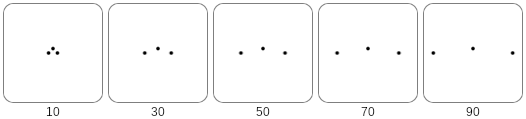

In [36]:
import mglyph as mg
def simple_points(x: float, canvas: mg.Canvas) -> None:
    canvas.points([(mg.lerp(x, canvas.xcenter, canvas.xleft), canvas.ycenter),
                    (canvas.xcenter, canvas.ycenter-0.1),
                   (mg.lerp(x, canvas.xcenter, canvas.xright), canvas.ycenter)],
                   cap='round', width=40)
    
mg.show(simple_points)

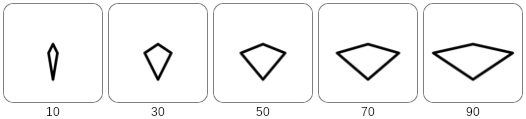

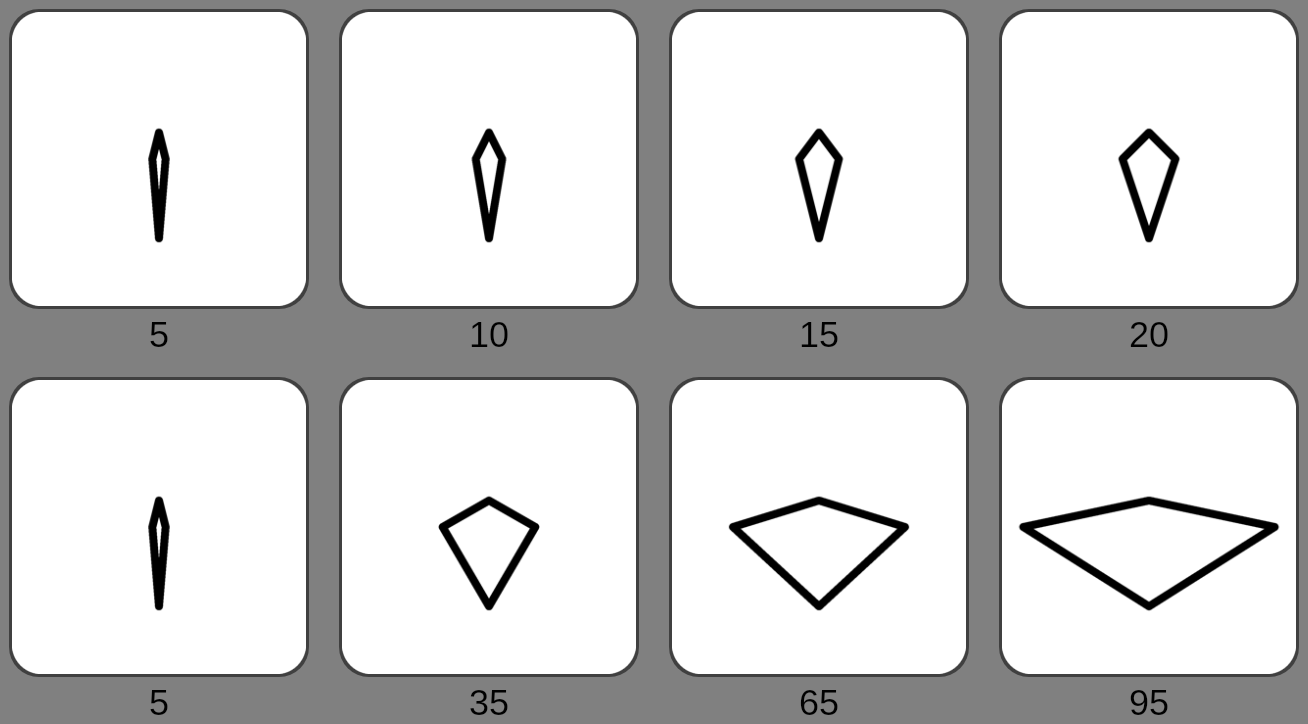

In [39]:
import mglyph as mg
def simple_polygon_2(x: float, canvas: mg.Canvas) -> None:
    l = (mg.lerp(x, canvas.xcenter, canvas.xleft), canvas.ycenter)
    ct = (canvas.xcenter, canvas.ycenter-0.2)
    r = (mg.lerp(x, canvas.xcenter, canvas.xright), canvas.ycenter)
    cb = (canvas.xcenter, canvas.ycenter+0.6)
    canvas.polygon([l, cb, r, ct], close=True, style='stroke', join='round', width='30p')
    
mg.show(simple_polygon_2)

mg.show(simple_polygon_2, scale=3, background='gray', spacing='10%',
        x=[[5, 10, 15, 20],
           [5, 35, 65, 95]])

## Exporting Glyph for Evaluation: `mg.export()`

* `name=` – title or short description of the glyph. Something like a chapter title in a book
* `short_name=` – short name for listings and leaderboards of glyphs. Something like a file name.
* `path=` – file to store the glyph into (possibly including the path to the file).  The glyph is essentially a `.zip` file with many files in it.  Naming it `xxx.zip` makes sense, naming it `xxx.mglyph` also makes sense.
* `author=`, `email=` – info about the author.  Optional.  Makes much sense for challenge submissions, so that the challenge organizers can contact the author.
* `author_public=False` – Show author's name in the leaderboards and glyph lists.  `False` by default.  The e-mail is never shown on public lists and pages by the challenge organizers; it is there for the purpose of contacting the authors.
* `xvalues=[x / 1000 * 100 for x in range(1001)]` – specification of what *x*-values to export.  By default, 1000 different *x*-values are exported: 0.0, 0.1, 0.2, 0.3, ... 100.0.  You may export less files, e.g. `xvalues=[2.0*x for x in range(51)]` exports values: 0, 2, 4, ... 50.

<font color="red">**zatim neodladeno !!!**</font>

In [47]:
import os
outpath = 'Exported_MGlyphs'
mg.export(simple_horizontal_line,
          name="Simple Horizontal Line", short_name='line',
          path=os.path.join(outpath, "Simple Horizontal Line.mglyph"),
          author="Jane Designoff", email="j.designoff@gmail.com", version="1.0.0")

IntProgress(value=0, description='Exporting:', max=1000)

FINISHED


## Three-Handed Clock – Efficient but not eligible as a malleable glyph

An example of a design that **violates the rule of illiteracy**.  

Unfortunately, this design is **not elligible** as a malleable glyph, and similarly, other designs that would use multiple indicators that are combined together, turning into certain graphical **digits** of different **orders**.

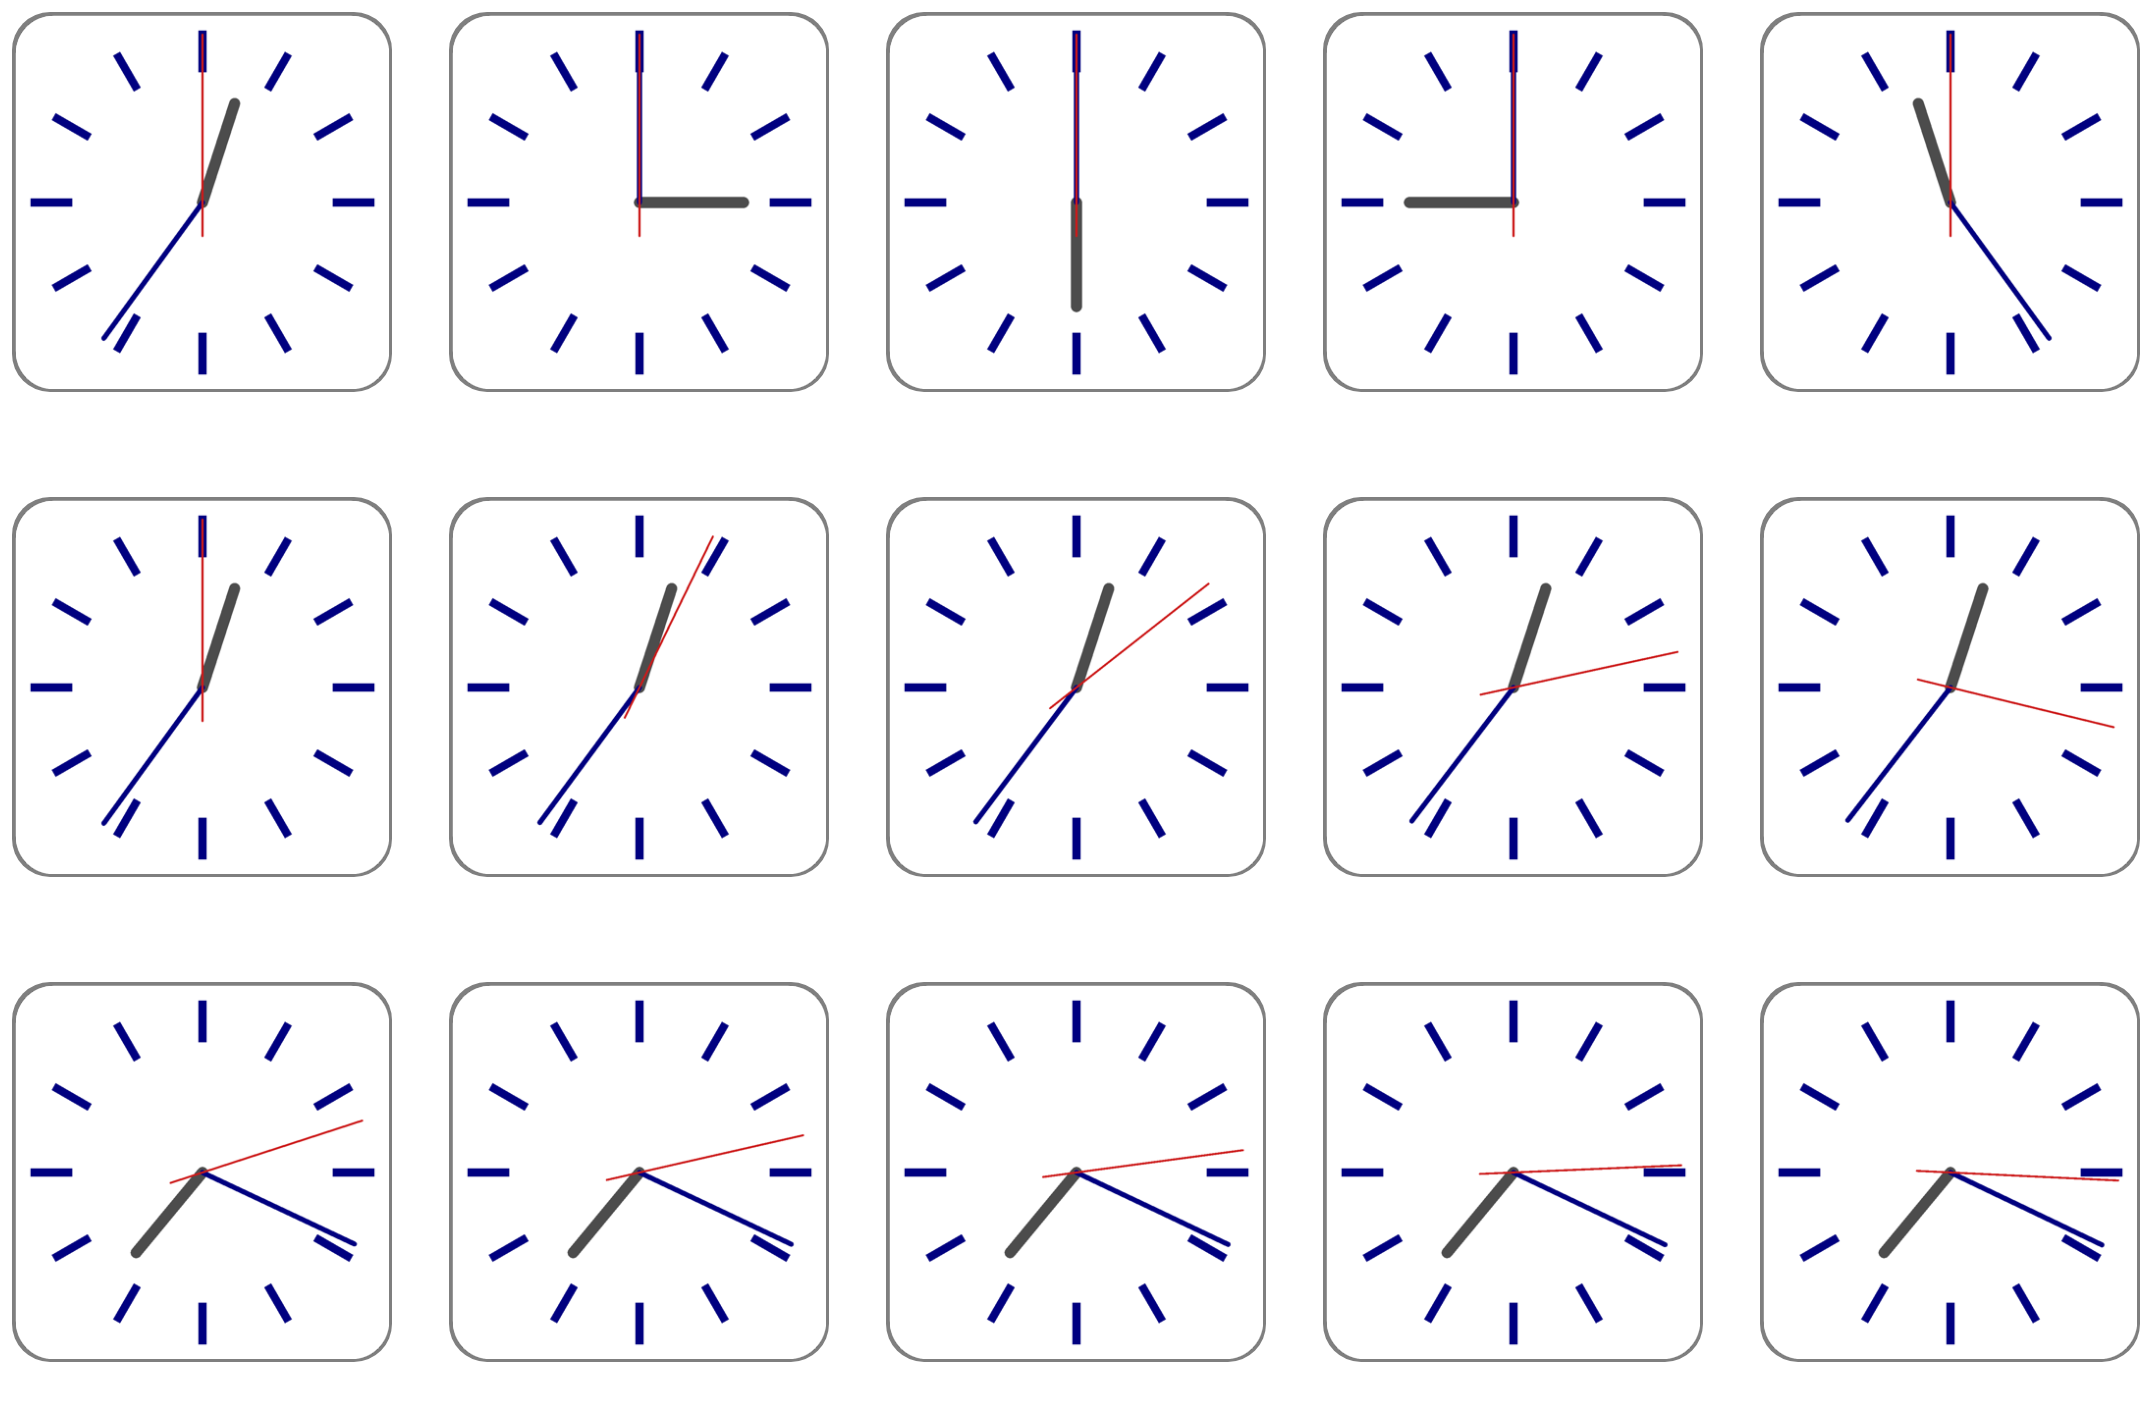

In [42]:
import math
def three_handed_clock(x: float, canvas: mg.Canvas) -> None:
  # draw 12 hour-marks
  for hour in range(12):
    canvas.line(mg.orbit(canvas.center, hour*math.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),
                         cap='square', color=(0,0,0.5), width='24p', style='stroke')

  # positions of hands in radians
  hangle = -x/100 * 2*math.pi
  mangle = -x/100 * 12*2*math.pi
  sangle = -x/100 * 60*12*2*math.pi

  # draw clock's hands
  canvas.line(canvas.center, mg.orbit(canvas.center, hangle, 0.62*canvas.ysize/2), cap='round', color=(0.3,0.3,0.3), width='33p', style='stroke')
  canvas.line(canvas.center, mg.orbit(canvas.center, mangle, 1.0*canvas.ysize/2), cap='round', color=(0.0,0.0,0.5), width='15p', style='stroke')
  canvas.line(mg.orbit(canvas.center, sangle+math.pi, 0.2*canvas.ysize/2),
              mg.orbit(canvas.center, sangle, 1.0*canvas.ysize/2), cap='round', color=(0.8,0.1,0.1), width='6p', style='stroke')
    
mg.show(three_handed_clock, background=(0,0,0,0), spacing='15%', scale=3.8, value_color='white',
        x=[[5, 25, 50, 75, 95],
           [5.00, 5.01, 5.02, 5.03, 5.04],
           [61.000, 61.002, 61.004, 61.006, 61.008]])

***
# dale stare veci

nezkouseno a nyni urcite nefunkcni!!! \
musi se prevest na novou verzi - melo by jit bez vetsich obtizi
***

In [170]:
import math
def three_handed_clock(x: float, canvas: mg.Canvas) -> None:
  # draw 12 hour-marks
  for hour in range(12):
    canvas.line(mg.orbit(canvas.center, hour*math.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),
                         width='3.1pt', linecap='round', color='midnightblue')
    canvas.line(mg.orbit(canvas.center, hour*math.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),
                width='2.4pt', linecap='round', color='white')

  # positions of hands in radians
  hangle = -x/100 * 2*math.pi
  mangle = -x/100 * 12*2*math.pi
  sangle = -x/100 * 60*12*2*math.pi

  # draw clock's hands
  canvas.line(canvas.center, mg.orbit(canvas.center, hangle, 0.62*canvas.ysize/2),  
              width='3.3pt', linecap='round', color='#333333')
  canvas.line(canvas.center, mg.orbit(canvas.center, mangle, 1.0*canvas.ysize/2),  
              width='1.5pt', linecap='round', color='midnightblue')
  canvas.line(mg.orbit(canvas.center, sangle+math.pi, 0.2*canvas.ysize/2),
              mg.orbit(canvas.center, sangle, 1.0*canvas.ysize/2),  
              width='0.6pt', linecap='round', color='maroon')

mg.show(three_handed_clock, background='whitesmoke', 
        x=[[5, 25, 50, 75, 95],
           [5.00, 5.01, 5.02, 5.03, 5.04],
           [61.000, 61.002, 61.004, 61.006, 61.008]])

TypeError: Canvas.line() got an unexpected keyword argument 'width'

## One-Handed Clock – This one is elligible

There are three variants, adding static decoration on the clock face.  It is worth testing whether there would be differences and which one performs best!

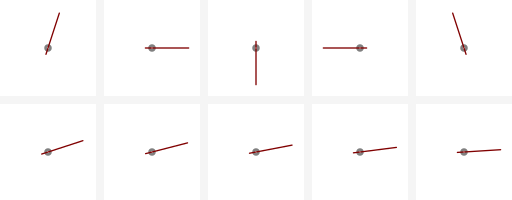

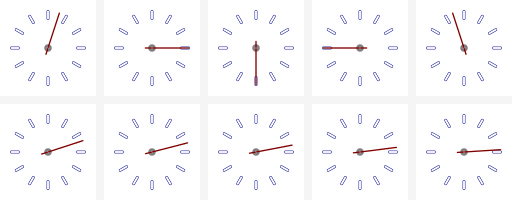

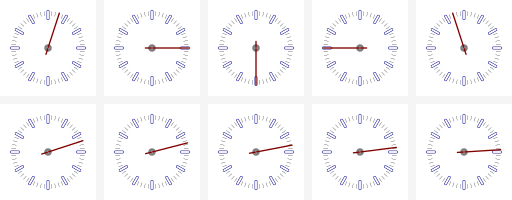

In [24]:
def one_handed_clock(x: float, canvas: mg.Canvas) -> None:
  canvas.circle(canvas.center, radius=canvas.ysize/30, fill='white', stroke='grey', stroke_width='2pt')
  angle = -x/100 * 2*math.pi
  canvas.line(mg_orbit(canvas.center, angle+math.pi, 0.18 * canvas.ysize/2),
              mg_orbit(canvas.center, angle, 1.0*canvas.ysize/2),  
              width='1pt', linecap='round', color='maroon')

def one_handed_clock_with_hticks(x: float, canvas: mg.Canvas) -> None:
  for hour in range(12):
    canvas.line(mg_orbit(canvas.center, hour*math.pi/6, 0.8*canvas.ysize/2),
                mg_orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),
                width='2.1pt', linecap='round', color='darkblue')
    canvas.line(mg_orbit(canvas.center, hour*math.pi/6, 0.8*canvas.ysize/2),
                mg_orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),  
                width='1.4pt', linecap='round', color='white')
  one_handed_clock(x, canvas)

def one_handed_clock_with_mticks(x: float, canvas: mg.Canvas) -> None:
  for minute in range(60):
    canvas.line(mg_orbit(canvas.center, minute*math.pi/30, 0.88*canvas.ysize/2),
                mg_orbit(canvas.center, minute*math.pi/30, 1.0*canvas.ysize/2), 
                width='0.2pt', linecap='round', color='black')
  one_handed_clock_with_hticks(x, canvas)

mg.show(one_handed_clock, background='whitesmoke', x=[[5, 25, 50, 75, 95], [20, 21, 22, 23, 24]])
mg.show(one_handed_clock_with_hticks, background='whitesmoke', x=[[5, 25, 50, 75, 95], [20, 21, 22, 23, 24]])
mg.show(one_handed_clock_with_mticks, background='whitesmoke', x=[[5, 25, 50, 75, 95], [20, 21, 22, 23, 24]])

In [13]:
xvalues=[0.5*x for x in range(201)]
mg.export(simple_horizontal_line, xvalues=xvalues,
          name="Simple Horizontal Line", short_name='line',
          path=os.path.join(outpath, "Simple Horizontal Line.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(simple_scaled_square, xvalues=xvalues,
          name="Simple Scaled Square", short_name='square',
          path=os.path.join(outpath, "Simple Scaled Squre.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(simple_scaled_circle, xvalues=xvalues,
          name="Simple Scaled Circle", short_name='circle',
          path=os.path.join(outpath, "Simple Scaled Circle.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(simple_scaled_circle_filled, xvalues=xvalues,
          name="Simple Scaled Filled Circle", short_name='fcircle',
          path=os.path.join(outpath, "Simple Scaled Filled Circle.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(simple_scaled_star, xvalues=xvalues,
          name="Simple Scaled Star", short_name='star',
          path=os.path.join(outpath, "Simple Scaled Star.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")

mg.export(one_handed_clock, xvalues=xvalues,
          name="One-Handed Clock", short_name='clock',
          path=os.path.join(outpath, "One-Handed Clock.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(one_handed_clock_with_hticks, xvalues=xvalues,
          name="One-Handed Clock with Hours", short_name="clock-hours",
          path=os.path.join(outpath, "One-Handed Clock with Hours.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(one_handed_clock_with_mticks, xvalues=xvalues,
          name="One-Handed Clock with Minutes", short_name="clock-minutes",
          path=os.path.join(outpath, "One-Handed Clock with Minutes.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")

### <span style="background-color:Gold">mglyph library TODO</span>:

Docela cool by bylo, kdyby mg.interact uměl přijmout buď funkci s glyphem jak je to teď a nebo pole funkcí a pak by zobrazil tři glyphy vedle sebe, s jedním scrollbarem:

```mg.interact([one_handed_clock, one_handed_clock_with_hticks, one_handed_clock_with_mticks])```

Vůbec to není priorita, ale bylo by to cool.

A propos, je zajímavé, že teď je asi někde uvnitř vytvořený jediný interact, který naráz hýbe všemi glyphy v sešitě. Je to svým způsobem divné a maličko creepy, ale trochu i cool.  Normálnější by se mi zdálo, kdyby když mám několik sliderů a ke každému glyph, kdyby každý měl svoji pozici...  A zdá se mi, že to může být časem výkonnostní problém -- tento tutoriál by měl být potenciálně docela dlouhý a postupně ukazovat další a další glyphy a způsoby vykreslování. A pak už to asi začne výkonnostně drhnout?

### <span style="background-color:Gold">mglyph library TODO</span>:

`mg.export`
* "TypeError: export() missing 3 required positional arguments: 'author', 'email', and 'version'" -- author, email a version bych dal nepovinné. Když to uživatel nevyplní, tak default bude None a do metadat se nic nenapíše. Glyph pak bude anonymní a bez verze...


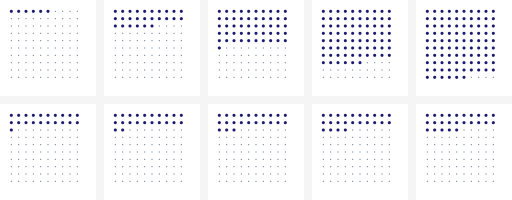

In [ ]:
def hundred_dots(x: float, canvas: mg.Canvas) -> None:
    base = 10
    for row in range(base):
        for col in range(base):
            if (row*base + col) <= mg.lerp(x, 0, base**2):
                canvas.circle(((col/base)*canvas.xsize+canvas.xleft, (row/base)*canvas.ysize+canvas.ytop),
                    radius=canvas.ysize*0.021, fill='midnightblue', stroke_width='0pt')
            else:
                canvas.circle(((col/base)*canvas.xsize+canvas.xleft, (row/base)*canvas.ysize+canvas.ytop),
                    radius=canvas.ysize*0.009, fill='lightslategray', stroke_width='0pt')

mg.show(hundred_dots, background='whitesmoke', x=[[5, 25, 50, 75, 95], [20, 21, 22, 23, 24]])

In [ ]:
from scipy.stats import qmc

def halton_sequence(x: float, canvas: mg.Canvas) -> None:
    sampler = qmc.Halton(d=2, scramble=False)
    sampler.fast_forward(1)
    n = int(mg.lerp(x, 0, 1000))
    points = sampler.random(n=n)
    for i, point in zip(range(n), points):
        canvas.circle((point[0]*canvas.xsize-canvas.xleft, point[1]*canvas.ysize-canvas.ytop),
                      radius=canvas.ysize*0.015, fill='midnightblue', stroke_width='0pt')

mg.interact(halton_sequence)

interactive(children=(FloatSlider(value=100.0, description='x'), Output()), _dom_classes=('widget-interact',))